In [1]:
from matplotlib import pyplot as plt
from IPython import display
import pandas as pd
import numpy as np
import csv
import sqlite3

# Proof of Concept Goal - Show Studio Can Be Successful At Turning A Profit

Accomplishing this goal involves looking at types of movies that lend themselves to high profitability. In addition, partnering with another succesful studio that is experienced in making these types of movies will help to lay the framework for the new studio's success.

***The Bottom Line*** - Demonstrating profitability at the start will encourage studios, producers, filmcrew and actors to participate in future projects. 

* Genre Profitability
* Profitability v Movie Budget
* Example of Movies Fitting This Model

Genre is the best way to breakdown types of movies as it can define the entire production process. For example, below are some of the top grossing movies for the Action/Adventure/Sci-Fi genre:

In [2]:
df_action = pd.read_csv('data/idea1_only_aas.csv',index_col=0)
df_action.head()

,Movie Title,Budget (USD),Total Gross (USD),Profitability (GM%),Release Year,Average IMDB Rating,Director
436,Jurassic World,"$215,000,000","$2,301,125,489",90.66,2015,7.0,Colin Trevorrow
870,The Avengers,"$225,000,000","$2,141,215,444",89.49,2012,8.0,Joss Whedon
53,Black Panther,"$200,000,000","$2,048,317,790",90.24,2018,7.3,Ryan Coogler
464,Avengers: Age of Ultron,"$330,600,000","$1,862,019,831",82.25,2015,7.3,Joss Whedon
54,Jurassic World: Fallen Kingdom,"$170,000,000","$1,723,492,559",90.14,2018,6.2,J.A. Bayona


Immediately what comes to mind are elaborate film sets, stunt teams and a star-studded cast. These requirements keep a production budget relatively high compared to other genres. In contrast, Compare this to top grosing movies from the Adventure/Animation/Comedy genre:

In [3]:
df_anim = pd.read_csv('data/idea1_only_aac.csv',index_col=0)
df_anim.head()

,Movie Title,Budget (USD),Total Gross (USD),Profitability (GM%),Release Year,Average IMDB Rating,Director
751,Monsters University,"$200,000,000","$1,012,076,658",80.24,2013,7.2,Dan Scanlon
1178,Shrek Forever After,"$165,000,000","$994,981,460",83.42,2010,6.3,Mike Mitchell
1018,The Smurfs,"$110,000,000","$706,363,481",84.43,2011,5.4,Raja Gosnell
51,Hotel Transylvania 3: Summer Vacation,"$65,000,000","$694,580,054",90.64,2018,6.3,Genndy Tartakovsky
908,Wreck-It Ralph,"$165,000,000","$685,924,198",75.94,2012,7.7,Rich Moore


Most animated films require no physical set and no stunt team. A lot of an animated film's budget will go into the animation and modeling of the movie versus the cast budget. On average the budget for an animated movie will be lower than that of an Action/Adventure/Sci-Fi movie.

In [4]:
def clean_money(budget):
    '''
    Take money value stored as string and convert to integer
    '''
    split_list = budget.split(',')
    split_list[0] = split_list[0][1:]
    answer = ''
    for part in split_list:
        answer += part

    return int(answer)

print(f'Mean of Top Action/Adventure/Sci-fi Production Budgets: ${df_action["Budget (USD)"].map(clean_money).mean() / 1_000_000} million')
print(f'Mean of Top Adventure/Animation/Comedy Production Budgets: ${df_anim["Budget (USD)"].map(clean_money).mean() / 1_000_000} million')

Mean of Top Action/Adventure/Sci-fi Production Budgets: $191.88 million
Mean of Top Adventure/Animation/Comedy Production Budgets: $111.4 million


These defining differences between genres are not just between vastly different types like animation and action. They also exist within the genre subsets. For example, the adventure/animation/comedy genre has the highest average budget when compared to other genre amalgams that include animation. 

It's important to note that these genre labels with multiple are not grouping together of the individual genres. Instead, each genre is being used as a descriptor to create a brand new, more specific genre.This leads to the importance of genre specificity.

### Genre Specificity:

Gone are the days of single genre movies. It is impossible to group movies by a single genre name (i.e Action, Animation, Comedy, Drama, Romance). There is a difference between *The Notebook* and *50 First Dates*. One is a Romantic/Drama and the other is a Romantic/Comedy. These movies are created differently, marketed differently and viewed by different audiences.

<div class='center'>
<img src='https://m.media-amazon.com/images/M/MV5BMTk3OTM5Njg5M15BMl5BanBnXkFtZTYwMzA0ODI3._V1_.jpg' style='width:200px;'/>  <img src='https://www.kindpng.com/picc/m/10-103391_is-not-equal-to-mathematical-symbol-not-equal.png' style='width:50px;'/> <img src='https://upload.wikimedia.org/wikipedia/en/9/9d/50FirstDates.jpg', style='width:200px;'/>
</div>

### Viewing Production Budget as A Source of Risk:

"*It takes money to make money.*" - Sol Luckman

The above saying carries a lot of weight. As seen in the results below, a higher production budget equates to a higher gross income. However, the business decision as defined at the start is not looking for highest gross income but highest profitability. In this case, production budget now serves as a source of risk. The higher the production budget the more money is being risked on the film.

The goal is proof of concept - can the studio make a profitable movie.

## **Data Exploration**

The primary data sources came from [IMDB Datasets](https://datasets.imdbws.com/) and [Box Office Mojo by IMDB](https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP?ref_=mojo_ftr_help#).

The data columns important to this business decision are:
* ```Production Budget```
* ```Total Gross Income```
* ```Genre```
* ```Studio Name```
* ```Movie Title```
* ```Director Name```
* ```Oscar Award```

## **Data Cleaning**

For this decision there were some restrictions placed on the datasets to better represent the current film-making environment.

**Only movies with:**

* Production Budget and Total Gross Income Data
* A Recent Release Date (2000 or Later)
* A Common Genre (Having 20 or More Movies Released Since 2000)

      - Common Genres - Action/Adventure/Sci-Fi, Adventure/Animation/Comedy, Comedy/Romance
      - Uncommon Genres - Crime/Drama/Musical, Comedy/Documentary/Horror

The data was also restricted to an IQR of 80% with respect to profitability which is defined in the Feature Exploration section. The cleaning process can be found in the appendix folder.

## **Feature Engineering**

Profitability is the key feature when looking at a business' financial health. Operating at a loss will ensure a swift end. For this study Profitability will be defined as Percent Gross Margin.

### Profitability:

Define Profitability as Percent Gross Margin ($ GM $%).

$ GM $% $ = \frac{I - B}{B} $

Where:

$ I = $ Total Gross Income

$ B = $ Budget

### Profitability Explained:

In words, Profitability is what percent of every dollar made is above the cost. The max Profitability a movie can have is 100% (all profit and no costs). There is no limit on the lower end of Profitability. For Example, if a movie that cost 1,000,000 to make only makes 750,000 that would be a Profitability of -33% or a profit loss. The higher the production budget and the lower the gross income, the lower the Profitability.

### Creating Profitability Feature:

The profitability feature was created using the total gross income and production budget numbers from the Box Office Mojo dataset and added as its own column in the genre dataset.

## **Data Analysis**

From the IMDB and Budget datasets, two final datasets were created:

* The Genre Dataset - compares genre, profitability, budget and director - each row is a movie
* The Studio Dataset - compares studio and total gross income - each row is a movie

### Profitability and Production Budget By Genre

#### Importing the Genre Dataset Grouped By Genre

In [5]:
# Importing the grouped by genre dataset
df_idea1_g_grouped = pd.read_csv('data/idea1_main_genre_grouped.csv')

#Reset genre to be the index after importing csv
df_idea1_g_grouped.index = df_idea1_g_grouped['main_genre']
df_idea1_g_grouped.drop('main_genre',axis=1,inplace=True)
df_clean = df_idea1_g_grouped.copy(deep=True)

def dirty_money(dollar_int):
    '''
    Changes dollars as integer to dollars as string with commas and $ sign
    '''
    dollar_int = int(dollar_int)
    dollar_str = str(dollar_int)[::-1]
    final_dollar = ''
    counter = 0
    for number in dollar_str:
        counter += 1
        final_dollar += number
        if counter % 3 == 0:
            final_dollar += ','
    if final_dollar[::-1][0] == ',':
        final_dollar = final_dollar[:-1]
        return '$' + final_dollar[::-1]
    else:
        return '$' + final_dollar[::-1]

df_clean['mean_budget'] = df_idea1_g_grouped['mean_budget'].map(dirty_money)
df_clean.rename({'gross_margin':'Mean Profitability (GM%)','mean_budget':'Mean Budget (USD)'},inplace=True,axis=1)
df_clean.filter(['Mean Profitability (GM%)', 'Mean Budget (USD)']).head()

,Mean Profitability (GM%),Mean Budget (USD)
main_genre,,
Horror/Mystery/Thriller,90.182759,"$9,780,172"
Adventure/Animation/Comedy,72.574925,"$102,768,656"
Drama/Romance,71.060690,"$25,263,448"
Action/Adventure/Sci-Fi,71.002308,"$175,530,769"
Action/Adventure/Comedy,70.281429,"$102,071,428"


Above are the top 5 entries in the Genre Dataset grouped by genre. It is sorted by the mean profitability of each genre.  Below shows the mean profitabilities of each genre as a bar graph.

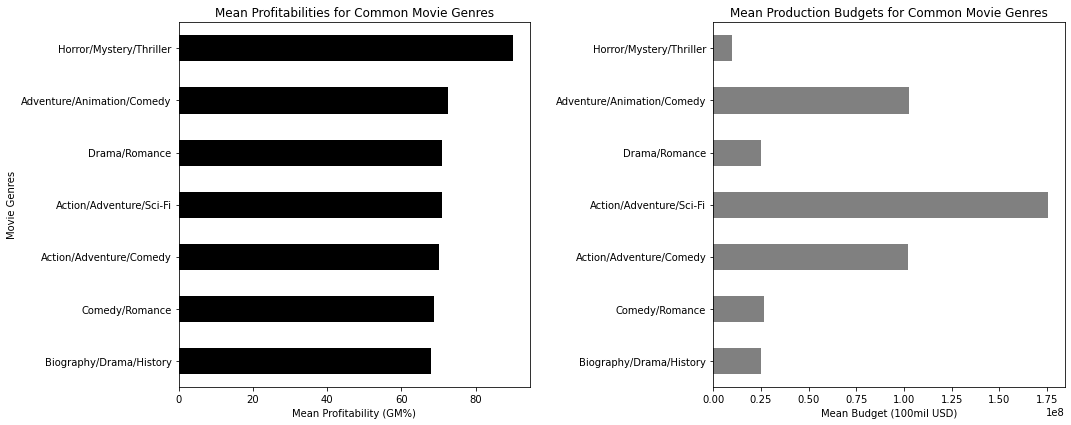

In [27]:
fig, axes = plt.subplots(nrows=1,ncols=2)

figsize = (15,6)
# fig.set_facecolor("")
df_idea1_g_grouped['gross_margin'][6::-1].plot(ax=axes[0], kind='barh', 
                                               figsize=figsize, color = 'Black',
                                               title='Mean Profitabilities for Common Movie Genres')
df_idea1_g_grouped['mean_budget'][6::-1].plot(kind='barh',ax=axes[1],
                                              color='Grey',
                                              title='Mean Production Budgets for Common Movie Genres')

fig.tight_layout()
axes[0].set_xlabel('Mean Profitability (GM%)')
axes[1].set_xlabel('Mean Budget (100mil USD)')
axes[0].set_ylabel('Movie Genres')
axes[1].set_ylabel('')
# axes[0].set_facecolor("")
# axes[1].set_facecolor("")
plt.show()

Not only is **Horror/Mystery/Thriller** at the top for profit, it also has by far the lowest budget costs compared to the other genres in the top 7 most profitable. **Adventure/Animation/Comedy** comes in second for profitability but is second highest for production budget.

### The Horror/Mystery/Thriller Genre has the Lowest Production Budget and Highest Profitability

The next two graphs shows Profitability v Production Budget by movie. The movies within the top two genres for profitability (as discovered above) are highlighted.

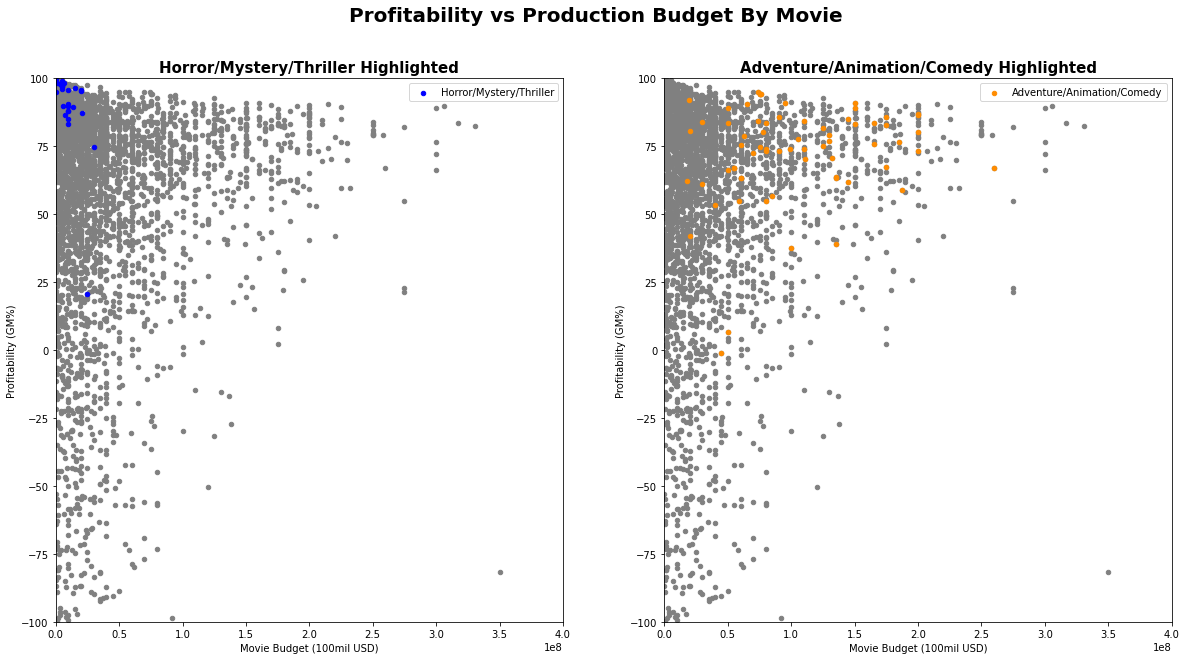

In [34]:
df_idea1_g = pd.read_csv('data/idea1_main_genre.csv')

# Plotting
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)
# fig.set_facecolor("")
plt1_list = [df_idea1_g_grouped.index[0]]
plt2_list = [df_idea1_g_grouped.index[1]]

df_idea1_g[df_idea1_g['release_year'] >= 2000].plot(ax=axes[0],kind='scatter' , x='budget_int' , y ='gross_margin',color='Grey')
df_idea1_g[(df_idea1_g['release_year'] >= 2000) & (df_idea1_g['main_genre'].isin(plt1_list))].plot(ax=axes[0],kind='scatter',x='budget_int',y='gross_margin',color='Blue',label=plt1_list[0])

df_idea1_g[df_idea1_g['release_year'] >= 2000].plot(ax=axes[1],kind='scatter' , x='budget_int' , y ='gross_margin',color='Grey')
df_idea1_g[(df_idea1_g['release_year'] >= 2000) & (df_idea1_g['main_genre'].isin(plt2_list))].plot(ax=axes[1],kind='scatter',x='budget_int',y='gross_margin',color='DarkOrange',label=plt2_list[0])

axes[0].set_title('Horror/Mystery/Thriller Highlighted',fontsize=15,fontweight='bold')
axes[1].set_title('Adventure/Animation/Comedy Highlighted',fontsize=15,fontweight='bold')
fig.suptitle('Profitability vs Production Budget By Movie',fontsize=20, fontweight='bold')
for i in [0,1]:
        axes[i].set_ylabel('Profitability (GM%)')
        axes[i].set_xlabel('Movie Budget (100mil USD)')
        axes[i].set_ylim(-100,100)
        axes[i].set_xlim(0,4e8)
        # axes[i].set_facecolor("")
plt.show()

The left graph shows horror/mystery/thriller movies clustered to the top left. This indicates high profitability and some of the lowest movie budgets across all genres. The next most profitable genre is shown in the right graph. This shows a much larger spread on production budget.

### Horror/Mystery/Thriller Genre Director Performance - For Chosing Director

The table below shows the top 10 grossing Horror/Mystery/Thriller movies with director information.

In [30]:
df_director = pd.read_csv('data/idea1_only_hmt.csv')
df_director.loc[:9 ,'Movie Title':]

,Movie Title,Budget (USD),Total Gross (USD),Profitability (GM%),Release Year,Average IMDB Rating,Director
0,The Conjuring,"$20,000,000","$455,400,282",95.61,2013,7.5,James Wan
1,Annabelle: Creation,"$15,000,000","$407,477,066",96.32,2017,6.5,David F. Sandberg
2,Annabelle,"$6,500,000","$341,136,733",98.09,2014,5.4,John R. Leonetti
3,Insidious: The Last Key,"$10,000,000","$235,630,918",95.76,2018,5.7,Adam Robitel
4,Happy Death Day,"$5,000,000","$180,694,105",97.23,2017,6.6,Christopher Landon
5,The Visit,"$5,000,000","$163,883,921",96.95,2015,6.2,M. Night Shyamalan
6,Sinister,"$3,000,000","$135,814,710",97.79,2012,6.8,Scott Derrickson
7,The Possession,"$14,000,000","$132,055,652",89.40,2012,5.9,Ole Bornedal
8,Paranormal Activity: The Marked Ones,"$5,000,000","$123,367,226",95.95,2014,5.0,Christopher Landon
9,Deliver Us from Evil,"$30,000,000","$118,533,740",74.69,2014,6.2,Scott Derrickson


 **James Wan** has directed, produced or written half of the most successful horror/mystery/thriller movies of the last two decades. He was also the main director for the top grossing horror/mystery/thriller of all time - The Conjuring. He would be our

### Top Performing Studio Data For Choosing Studio To Partner with

In [9]:
df_top_grossing_studios = pd.read_csv('data/top_grossing_studios.csv')
df_top_grossing_studios.index = df_top_grossing_studios[df_top_grossing_studios.columns[0]]
df_top_grossing_studios.drop(df_top_grossing_studios.columns[0], axis = 1, inplace = True)
df_top_grossing_studios.index.names = ['']
df_top_grossing_studios.head(7)

,BV,Sony,Fox,Uni.,Par.,WB,LGF,SPC,IFC,Magn.
,,,,,,,,,,
Grosses,"[415000000, 334200000, 200800000, 172100000, 9...","[176600000, 118300000, 67600000, 162000000, 97...","[104400000, 76400000, 42800000, 88800000, 7720...","[251500000, 105300000, 148400000, 62000000, 35...","[312400000, 131800000, 128000000, 171200000, 8...","[296000000, 292600000, 163200000, 100500000, 1...","[103100000, 45700000, 47100000, 48100000, 4100...","[3200000, 6400000, 3200000, 2100000, 1300000, ...","[504000, 128000, 277000, 55800, 619000, 217000...","[27800, 552000, 5000000, 124000, 237000, 55000..."
max_gross,936700000,404500000,363100000,652300000,312400000,448100000,424700000,56800000,25400000,7100000
min_gross,48500,2500,2800000,22000,6700,139000,1400,66600,800,100
total_gross,18419029199,8459683098,10949499997,12902393000,7685870699,12168046000,4118963400,442030999,112662899,63559700
total_films,106,109,136,147,101,140,102,123,166,136
mean_gross,173764426,77611771,80511029,87771380,76097729,86914614,40381994,3593747,678692,467350
median_gross,92100000,63500000,62150000,61000000,57700000,47250000,23000000,1700000,141500,123500


In [10]:
above_100_studios = list(df_top_grossing_studios.keys())
medians = []
for median in df_top_grossing_studios:
    medians.append(int((df_top_grossing_studios[median]['median_gross'])))
median_total_gr = 1100000

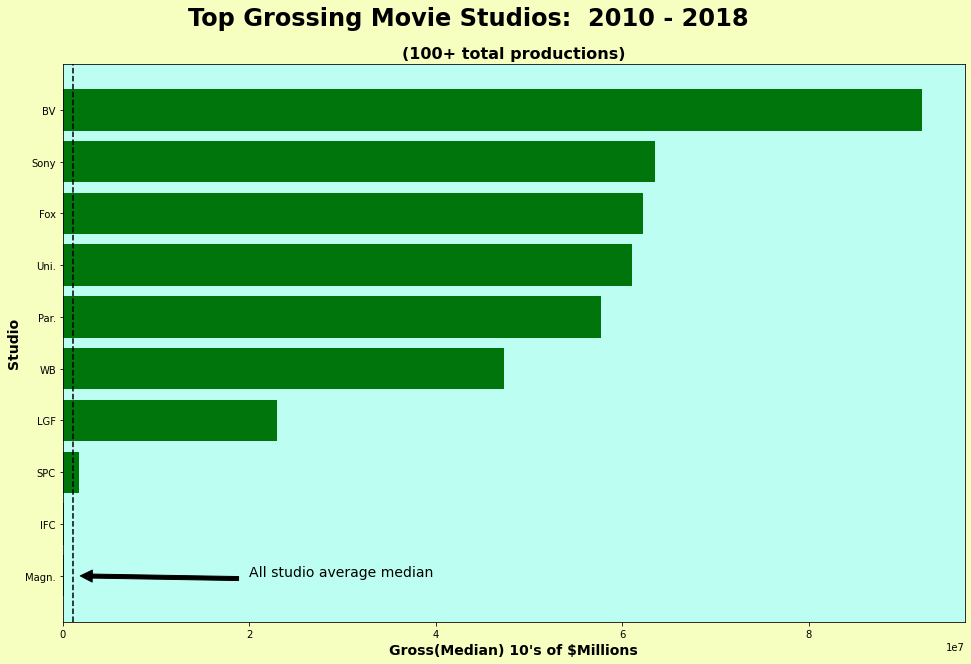

In [11]:
x = above_100_studios
x.reverse()
y = medians
y.reverse()

fig, top_studios = plt.subplots(figsize = (15,10))
fig.subplots_adjust(top=0.85)

fig.set_facecolor("#f6ffc0")
fig.suptitle('Top Grossing Movie Studios:  2010 - 2018',fontsize=24,fontweight='bold')
fig.subplots_adjust(right=.96,top=.9)
top_studios.axvline(median_total_gr, ls='--', color='black')
top_studios.annotate('All studio average median', fontsize=14, xy=(900000,'Magn.'), xytext=(20000000,'Magn.'), arrowprops=dict(facecolor='black', shrink=0.05))
top_studios.set_facecolor("#bcfff2")
top_studios.barh(x,y, color = '#00750c')
top_studios.set_title("(100+ total productions)", fontsize=16, fontweight='bold')
top_studios.set_xlabel("Gross(Median) 10's of $Millions", fontsize=14, fontweight='bold')
top_studios.set_ylabel("Studio", fontsize=14,fontweight='bold');

####  All studio average median is represented by the vertical dashed line

BV = Buena Vista (Disney)<br>
Uni. = Universal Studios<br>
Par. = Paramount Pictures<br>
WB = Warner Bros. Studios<br>
LGF = Lionsgate Entertainment Corp.<br>
SPC = Sony Pictures Classics<br>
IFC = Independent Film Channel (owned by AMC)<br>
Magn. = Magnolia Pictures

### The Oscars
#### Looking at the IMDB title basics and the oscars awards dataframe

In [12]:
Titlebasics = pd.read_csv('data/title.basics.csv')  
oscars = pd.read_csv('data/the_oscar_award.csv')

In [13]:
Titlebasics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [14]:
oscars

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


##### Combining the title basics and oscar awards dataframe
In order to relate the oscar winnings/nominations to a genre, we'll have to merge the dataframes. Upon analyzing the two, we can relate the data by movie title using the "primary_title" and "start_year" columns in the Titlebasics dataframe to the "film" and "year_film" columns in the oscars dataframe

In [15]:
Oscar_w_genre = oscars.merge(Titlebasics, how="left", left_on=['film','year_film'], right_on=['primary_title','start_year'])
Oscar_w_genre

,year_film,year_ceremony,ceremony,category,name,film,winner,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,NaN,NaN,NaN,NaN,NaN,NaN
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,NaN,NaN,NaN,NaN,NaN,NaN
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,NaN,NaN,NaN,NaN,NaN,NaN
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True,tt6751668,Parasite,Gisaengchung,2019.0,132.0,"Drama,Thriller"
10425,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
10426,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
10427,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN


##### Getting only the data we want
We'll be analyzing the oscar awards by genre going from 2010 onward. We'll set up a new data frame that will only contain movies from the past 11 years and remove any NA values from the "genres" column.

In [16]:
Oscar_since2010 = Oscar_w_genre[(Oscar_w_genre['year_film'] >= 2010)].sort_values(by='year_film', ascending=True)

In [17]:
Oscar_since2010.dropna(subset = ['genres'], inplace=True)
Oscar_since2010

,year_film,year_ceremony,ceremony,category,name,film,winner,tconst,primary_title,original_title,start_year,runtime_minutes,genres
9142,2010,2011,83,ACTOR IN A LEADING ROLE,Javier Bardem,Biutiful,False,tt1164999,Biutiful,Biutiful,2010.0,148.0,"Drama,Romance"
9229,2010,2011,83,BEST PICTURE,"Anne Rosellini and Alix Madigan-Yorkin, Producers",Winter's Bone,False,tt1399683,Winter's Bone,Winter's Bone,2010.0,100.0,"Drama,Mystery"
9228,2010,2011,83,BEST PICTURE,"Scott Rudin, Ethan Coen and Joel Coen, Producers",True Grit,False,tt1403865,True Grit,True Grit,2010.0,110.0,"Adventure,Drama,Western"
9227,2010,2011,83,BEST PICTURE,"Darla K. Anderson, Producer",Toy Story 3,False,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
9226,2010,2011,83,BEST PICTURE,"Scott Rudin, Dana Brunetti, Michael De Luca an...",The Social Network,False,tt1285016,The Social Network,The Social Network,2010.0,120.0,"Biography,Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2019,2020,92,DIRECTING,Bong Joon Ho,Parasite,True,tt10378788,Parasite,Parasite,2019.0,NaN,"Action,Horror,Sci-Fi"
10332,2019,2020,92,DIRECTING,Sam Mendes,1917,False,tt8579674,1917,1917,2019.0,NaN,"Drama,War"
10331,2019,2020,92,DIRECTING,Todd Phillips,Joker,False,tt7286456,Joker,Joker,2019.0,NaN,"Crime,Drama,Thriller"
10328,2019,2020,92,COSTUME DESIGN,Jacqueline Durran,Little Women,True,tt3281548,Little Women,Little Women,2019.0,NaN,"Drama,Romance"


##### Count up the genres and plot
Now we'll analyze how many total oscars nominations per genre there were since 2010 and plot them.

In [18]:
Oscar_since2010C = Oscar_since2010['genres'].value_counts()[:15]
Oscar_since2010C

Biography,Drama,History       85
Drama                         69
Drama,Romance                 51
Action,Adventure,Sci-Fi       39
Adventure,Animation,Comedy    36
Biography,Drama               32
Biography,Comedy,Drama        31
Drama,Thriller                30
Comedy,Drama                  29
Adventure,Drama,Fantasy       28
Biography,Crime,Drama         24
Comedy,Drama,Romance          23
Crime,Drama                   22
Biography,Drama,Sport         21
Biography,Drama,Thriller      21
Name: genres, dtype: int64

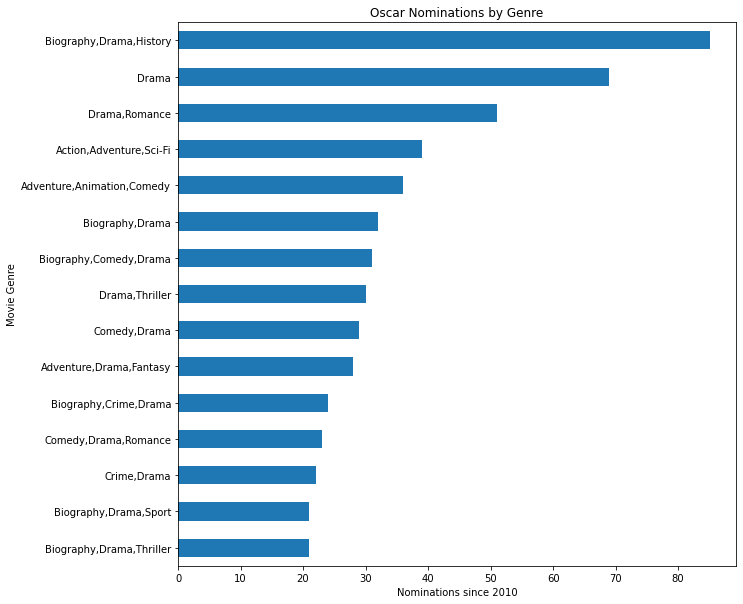

In [19]:
plt.figure(figsize=[10,10])
Oscar_since2010C[::-1].plot.barh()

plt.title("Oscar Nominations by Genre")
plt.xlabel("Nominations since 2010")
plt.ylabel("Movie Genre")


plt.show()

##### Oscar Wins
We can also analyze the number of wins by genre since 2010.


In [20]:
Oscar_Wins = Oscar_since2010[(Oscar_w_genre['winner'] == True)].sort_values(by='year_film', ascending=True)
Oscar_Wins

<ipython-input-20-64824dc55e63>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Oscar_Wins = Oscar_since2010[(Oscar_w_genre['winner'] == True)].sort_values(by='year_film', ascending=True)


,year_film,year_ceremony,ceremony,category,name,film,winner,tconst,primary_title,original_title,start_year,runtime_minutes,genres
9224,2010,2011,83,BEST PICTURE,"Iain Canning, Emile Sherman and Gareth Unwin, ...",The King's Speech,True,tt1504320,The King's Speech,The King's Speech,2010.0,118.0,"Biography,Drama,History"
9176,2010,2011,83,COSTUME DESIGN,Colleen Atwood,Alice in Wonderland,True,tt1014759,Alice in Wonderland,Alice in Wonderland,2010.0,108.0,"Adventure,Family,Fantasy"
9177,2010,2011,83,COSTUME DESIGN,Colleen Atwood,Alice in Wonderland,True,tt2049386,Alice in Wonderland,Alice in Wonderland,2010.0,99.0,"Fantasy,Musical"
9185,2010,2011,83,DIRECTING,Tom Hooper,The King's Speech,True,tt1504320,The King's Speech,The King's Speech,2010.0,118.0,"Biography,Drama,History"
9190,2010,2011,83,DOCUMENTARY (Feature),Charles Ferguson and Audrey Marrs,Inside Job,True,tt1645089,Inside Job,Inside Job,2010.0,109.0,"Crime,Documentary"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10382,2019,2020,92,BEST PICTURE,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,True,tt6751668,Parasite,Gisaengchung,2019.0,132.0,"Drama,Thriller"
10381,2019,2020,92,BEST PICTURE,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,True,tt10378788,Parasite,Parasite,2019.0,NaN,"Action,Horror,Sci-Fi"
10334,2019,2020,92,DIRECTING,Bong Joon Ho,Parasite,True,tt10378788,Parasite,Parasite,2019.0,NaN,"Action,Horror,Sci-Fi"
10407,2019,2020,92,SOUND MIXING,Mark Taylor and Stuart Wilson,1917,True,tt8579674,1917,1917,2019.0,NaN,"Drama,War"


In [21]:
Oscar_WinsC = Oscar_Wins['genres'].value_counts()[:15]
Oscar_WinsC

Drama                         17
Biography,Drama,History       17
Action,Adventure,Sci-Fi       13
Adventure,Animation,Comedy    11
Drama,Thriller                 9
Biography,Drama                9
Drama,Romance                  9
Adventure,Drama,Fantasy        8
Drama,Sci-Fi,Thriller          7
Comedy,Drama,Romance           6
Comedy,Drama,Music             6
Biography,Comedy,Drama         6
Adventure,Drama,Family         6
Biography,Drama,Music          5
Comedy,Drama                   5
Name: genres, dtype: int64

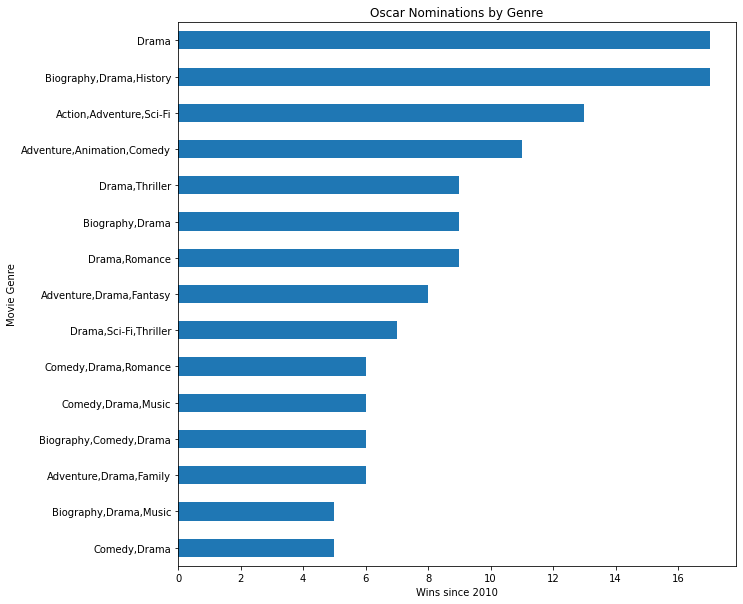

In [22]:
plt.figure(figsize=[10,10])
Oscar_WinsC[::-1].plot.barh()

plt.title("Oscar Nominations by Genre")
plt.xlabel("Wins since 2010")
plt.ylabel("Movie Genre")

plt.show()

## **Conlusions**

* **Horror/Mystery/Thriller genre should be the focus for the first movies from the new Microsoft Studio.** These types of movies show the highest profitability and low required budget for success.
* **James Wan should be looked at as director of first movies** as he has been apart of 50% of the top grossing horror/mystery/thriller movies of the past two decades.

### Next Steps

#### Recommendations with regards to the Oscar Academy Awards
As a movie studio, you may decide to join the glorious pursuit of the ever covetted Oscar academy award. When you're ready to throw your hat into the ring, we highly recommend switching your main genre focus from Horror to Drama based on the wins and nominations since 2010.

## Citations

<https://mowe.studio/how-much-does-animation-cost-vs-live-action/>

<https://www.imdb.com/interfaces/>

<https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP?ref_=mojo_ftr_help#>